In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('../../Python for ML/DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

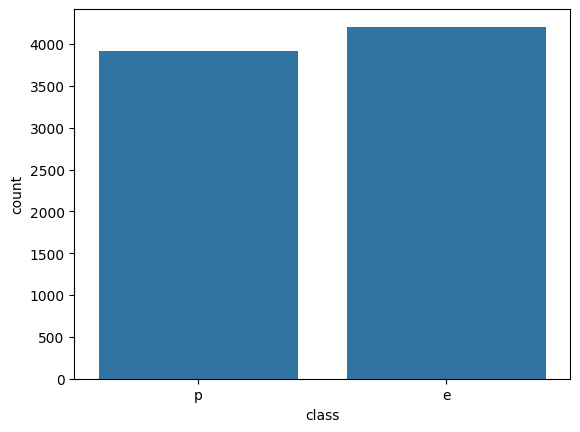

In [4]:
sns.countplot(data=df, x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
feature_df = df.describe().transpose().reset_index().sort_values(by='unique')
feature_df

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


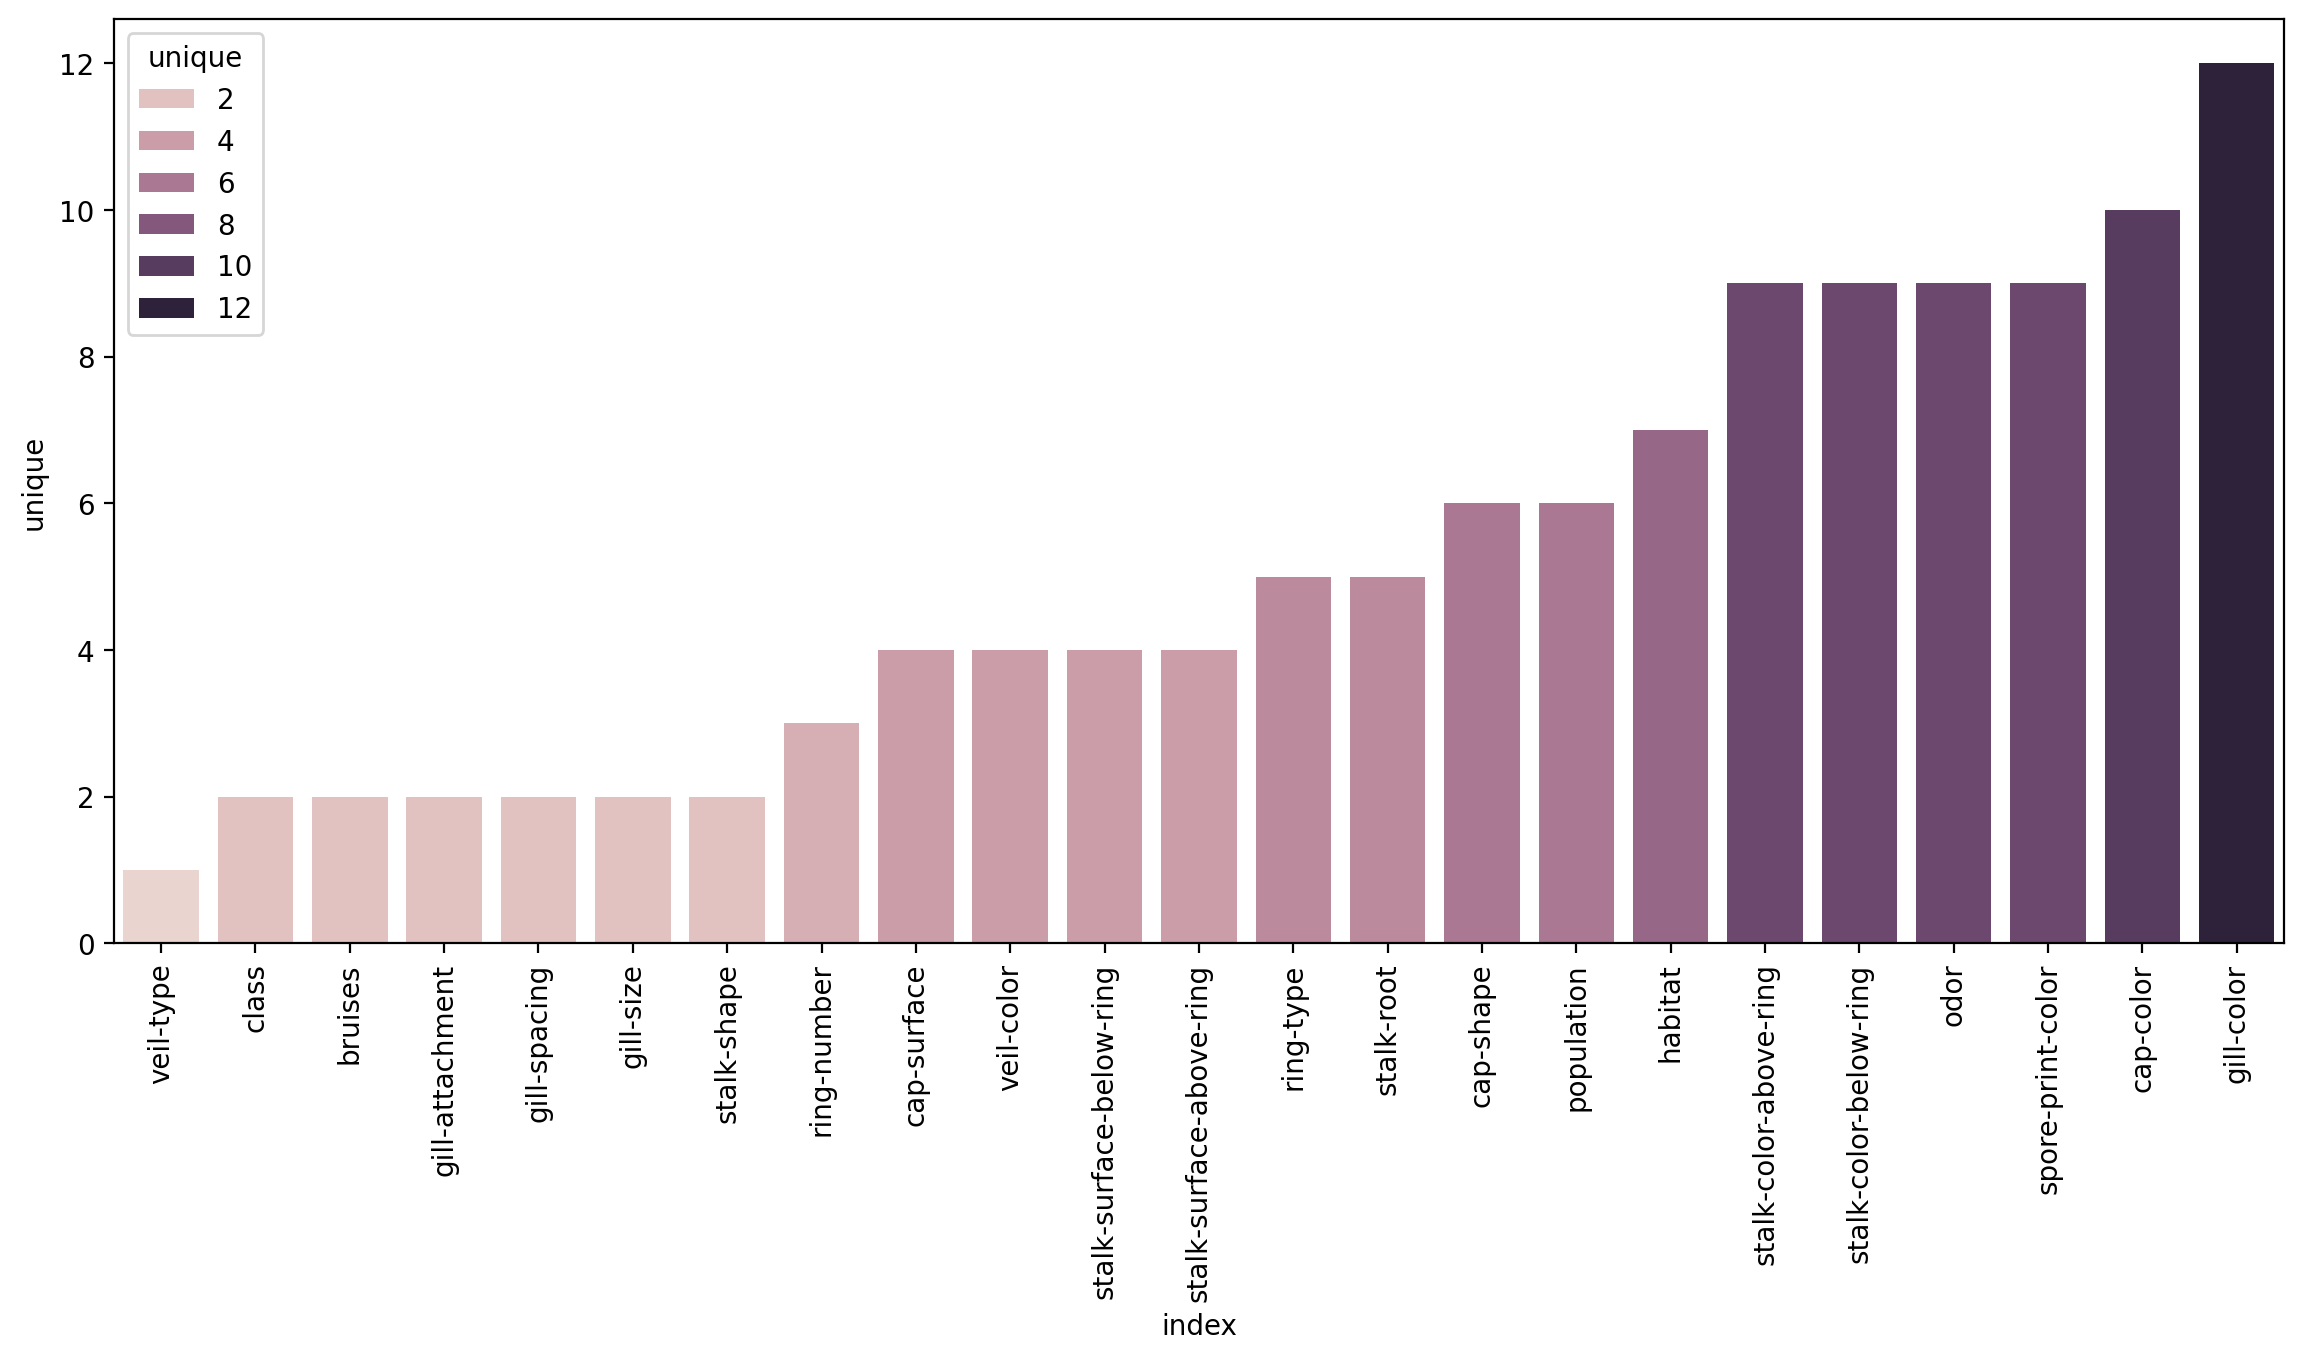

In [12]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=feature_df, x='index', y='unique', hue='unique')
plt.xticks(rotation=90);

In [14]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [15]:
X = df.drop('class', axis=1)

In [17]:
y = df['class']

In [18]:
X = pd.get_dummies(X, drop_first=True)
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [22]:
model = AdaBoostClassifier(n_estimators=1)

In [23]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [25]:
predictions = model.predict(X_test)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [27]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
model.feature_importances_.argmax()

np.int64(22)

In [29]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

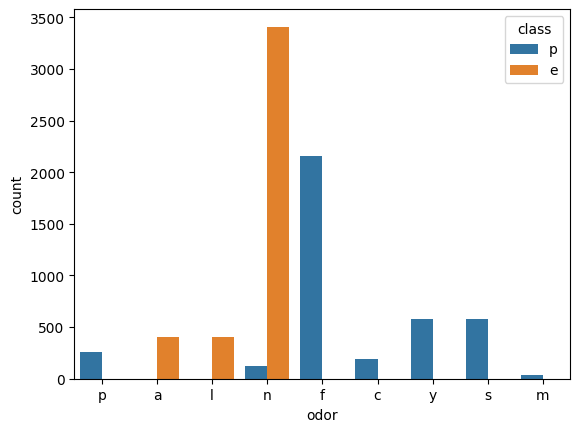

In [31]:
sns.countplot(data=df, x='odor', hue='class')

In [32]:
len(X.columns)

95

In [36]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)

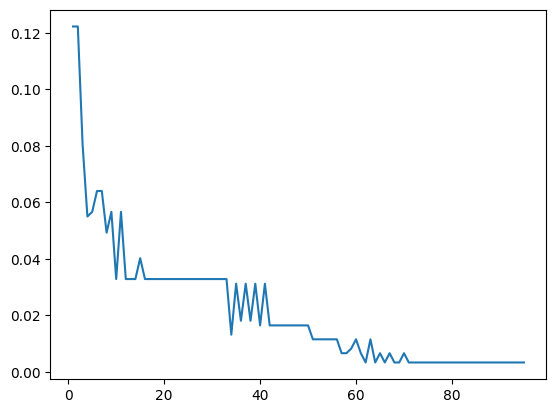

In [37]:
plt.plot(range(1, 96), error_rates)

In [38]:
model

AdaBoostClassifier(n_estimators=95)

In [45]:
features = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance']).sort_values(by='Importance', ascending=True)

In [46]:
features

,Importance
cap-shape_c,0.000000
stalk-color-below-ring_o,0.000000
stalk-color-below-ring_g,0.000000
stalk-color-below-ring_e,0.000000
stalk-color-below-ring_c,0.000000
...,...
odor_n,0.075969
odor_p,0.085536
odor_c,0.087581
odor_f,0.154831


In [47]:
imp_features = features[features['Importance'] > 0]
imp_features

,Importance
spore-print-color_n,0.012845
spore-print-color_u,0.014081
gill-spacing_w,0.014493
stalk-root_c,0.019609
stalk-shape_t,0.022613
ring-type_f,0.023459
spore-print-color_w,0.024706
population_v,0.029857
population_c,0.031219
odor_l,0.032974


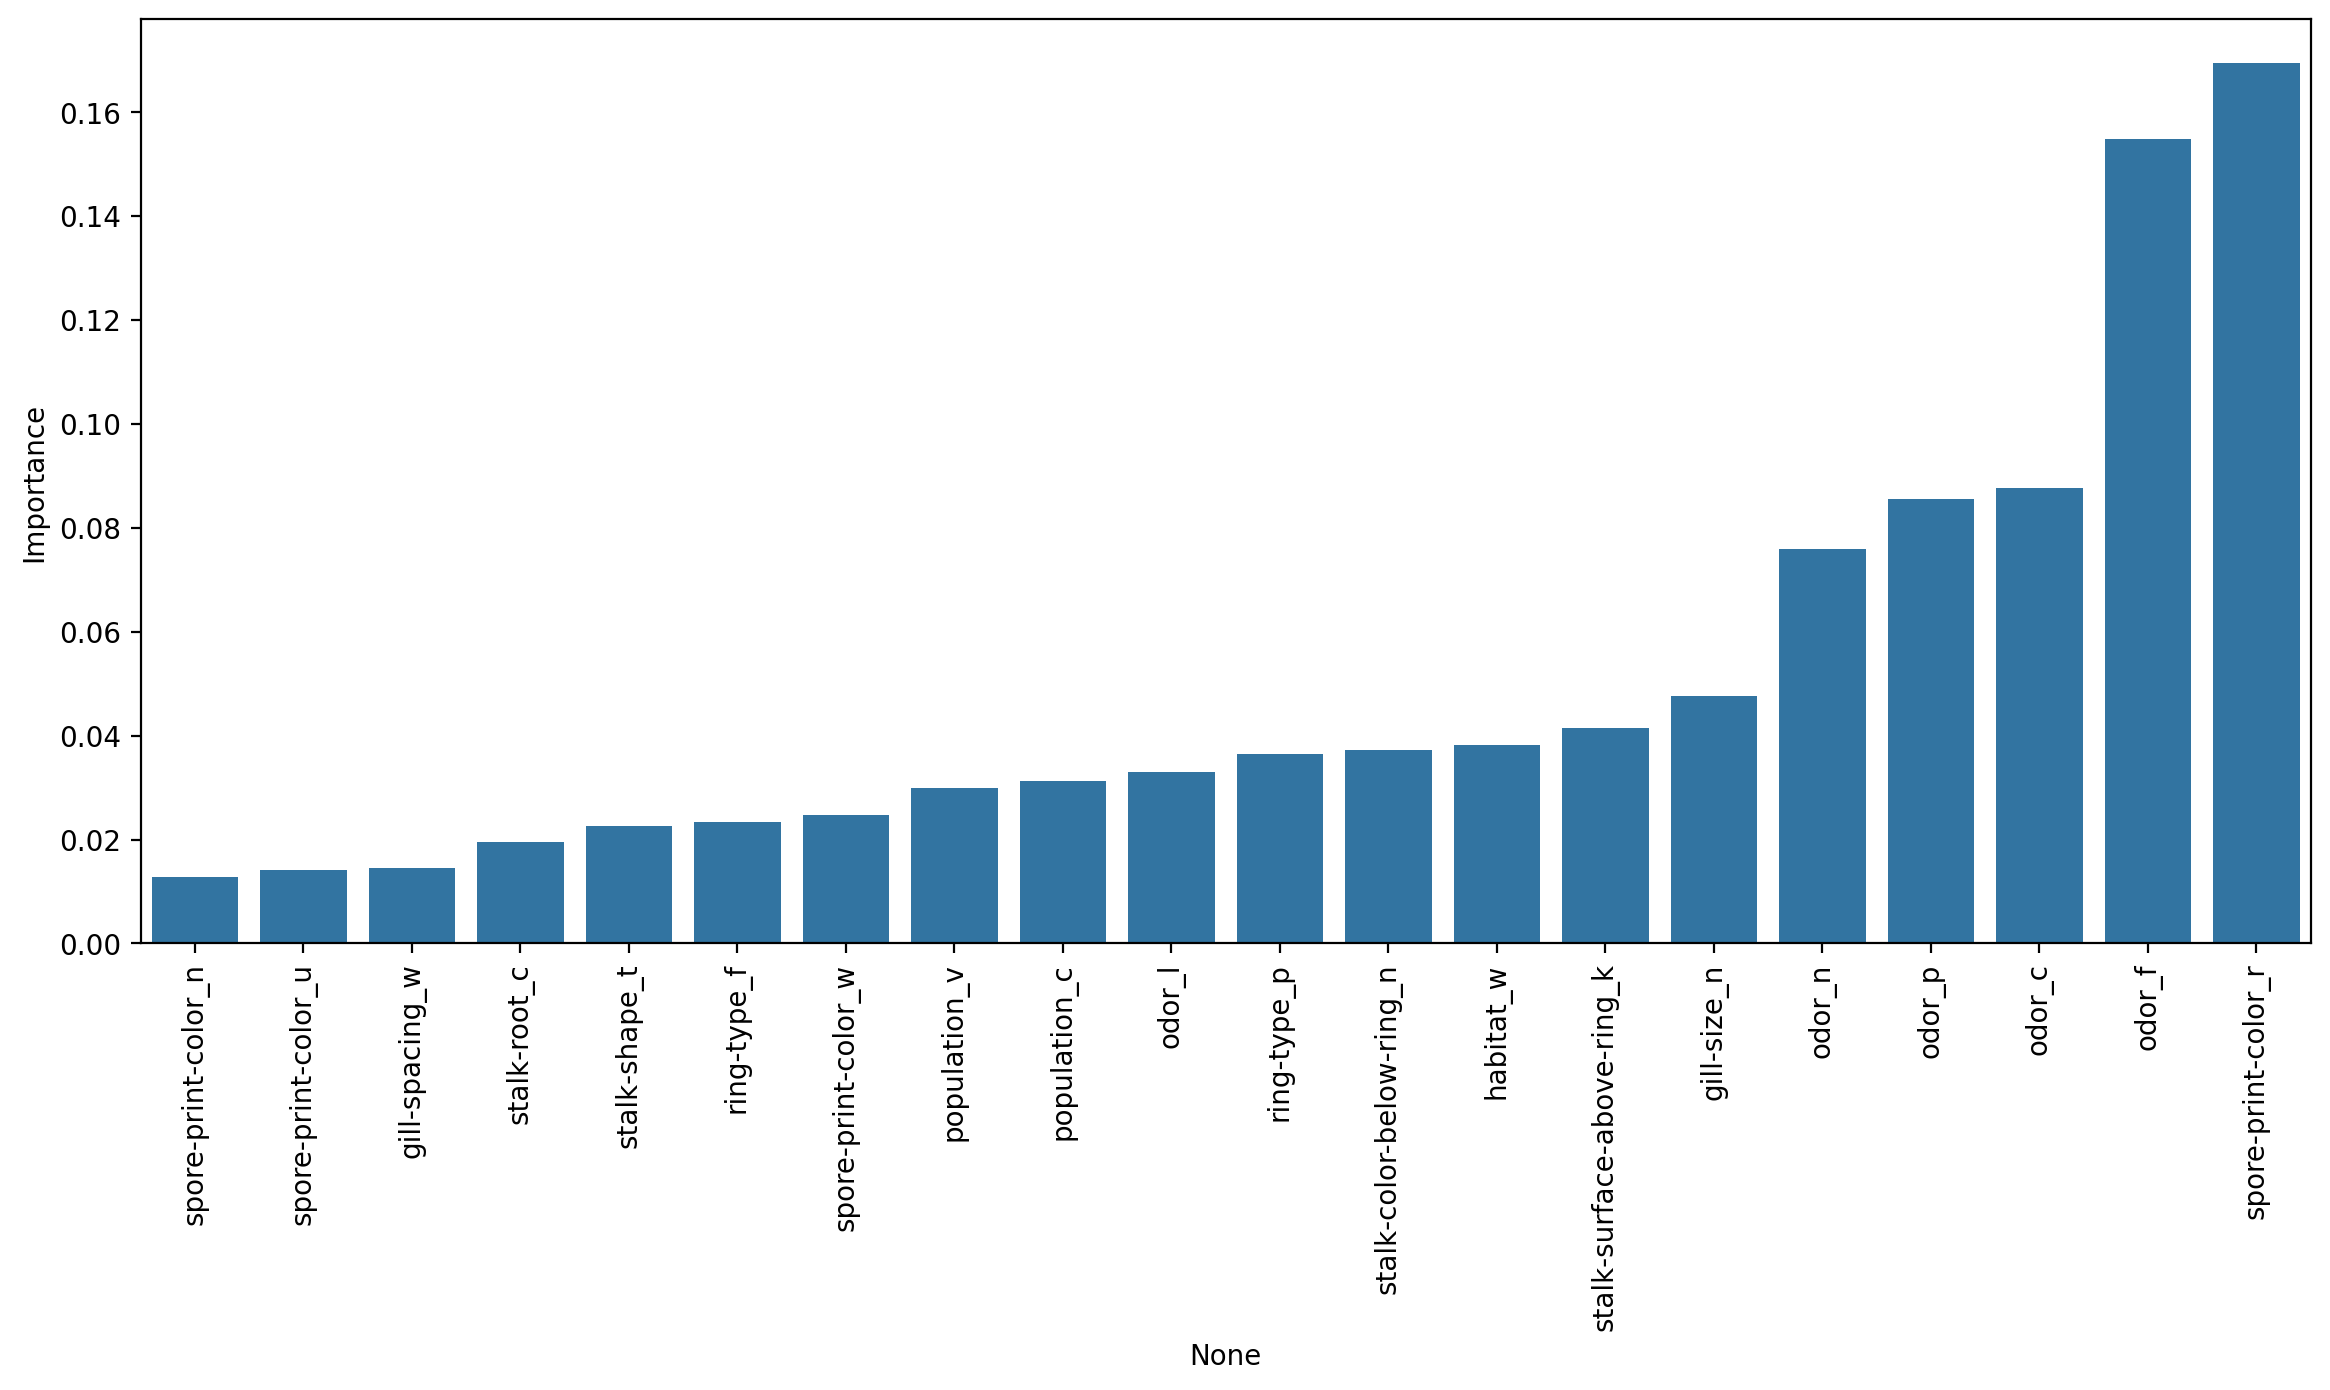

In [50]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=imp_features, x=imp_features.index, y='Importance')
plt.xticks(rotation=90);

In [51]:
model18 = AdaBoostClassifier(n_estimators=18)
model18.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=18)

In [53]:
model18.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1735858 ,
       0.06024999, 0.        , 0.19140668, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05991688, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06795744, 0.        , 0.05893068, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [54]:
features18_df = pd.DataFrame(index=X.columns, data=model18.feature_importances_, columns=['Importance']).sort_values(by='Importance', ascending=True)
features18_df

,Importance
cap-shape_c,0.000000
stalk-color-below-ring_y,0.000000
stalk-color-below-ring_w,0.000000
stalk-color-below-ring_p,0.000000
stalk-color-below-ring_o,0.000000
...,...
population_v,0.089728
ring-type_p,0.109813
odor_f,0.173586
spore-print-color_r,0.188411


In [55]:
imp_features18 = features18_df[features18_df['Importance'] > 0]
imp_features18

,Importance
stalk-root_c,0.058931
gill-size_n,0.059917
odor_l,0.060250
stalk-shape_t,0.067957
population_v,0.089728
ring-type_p,0.109813
odor_f,0.173586
spore-print-color_r,0.188411
odor_n,0.191407


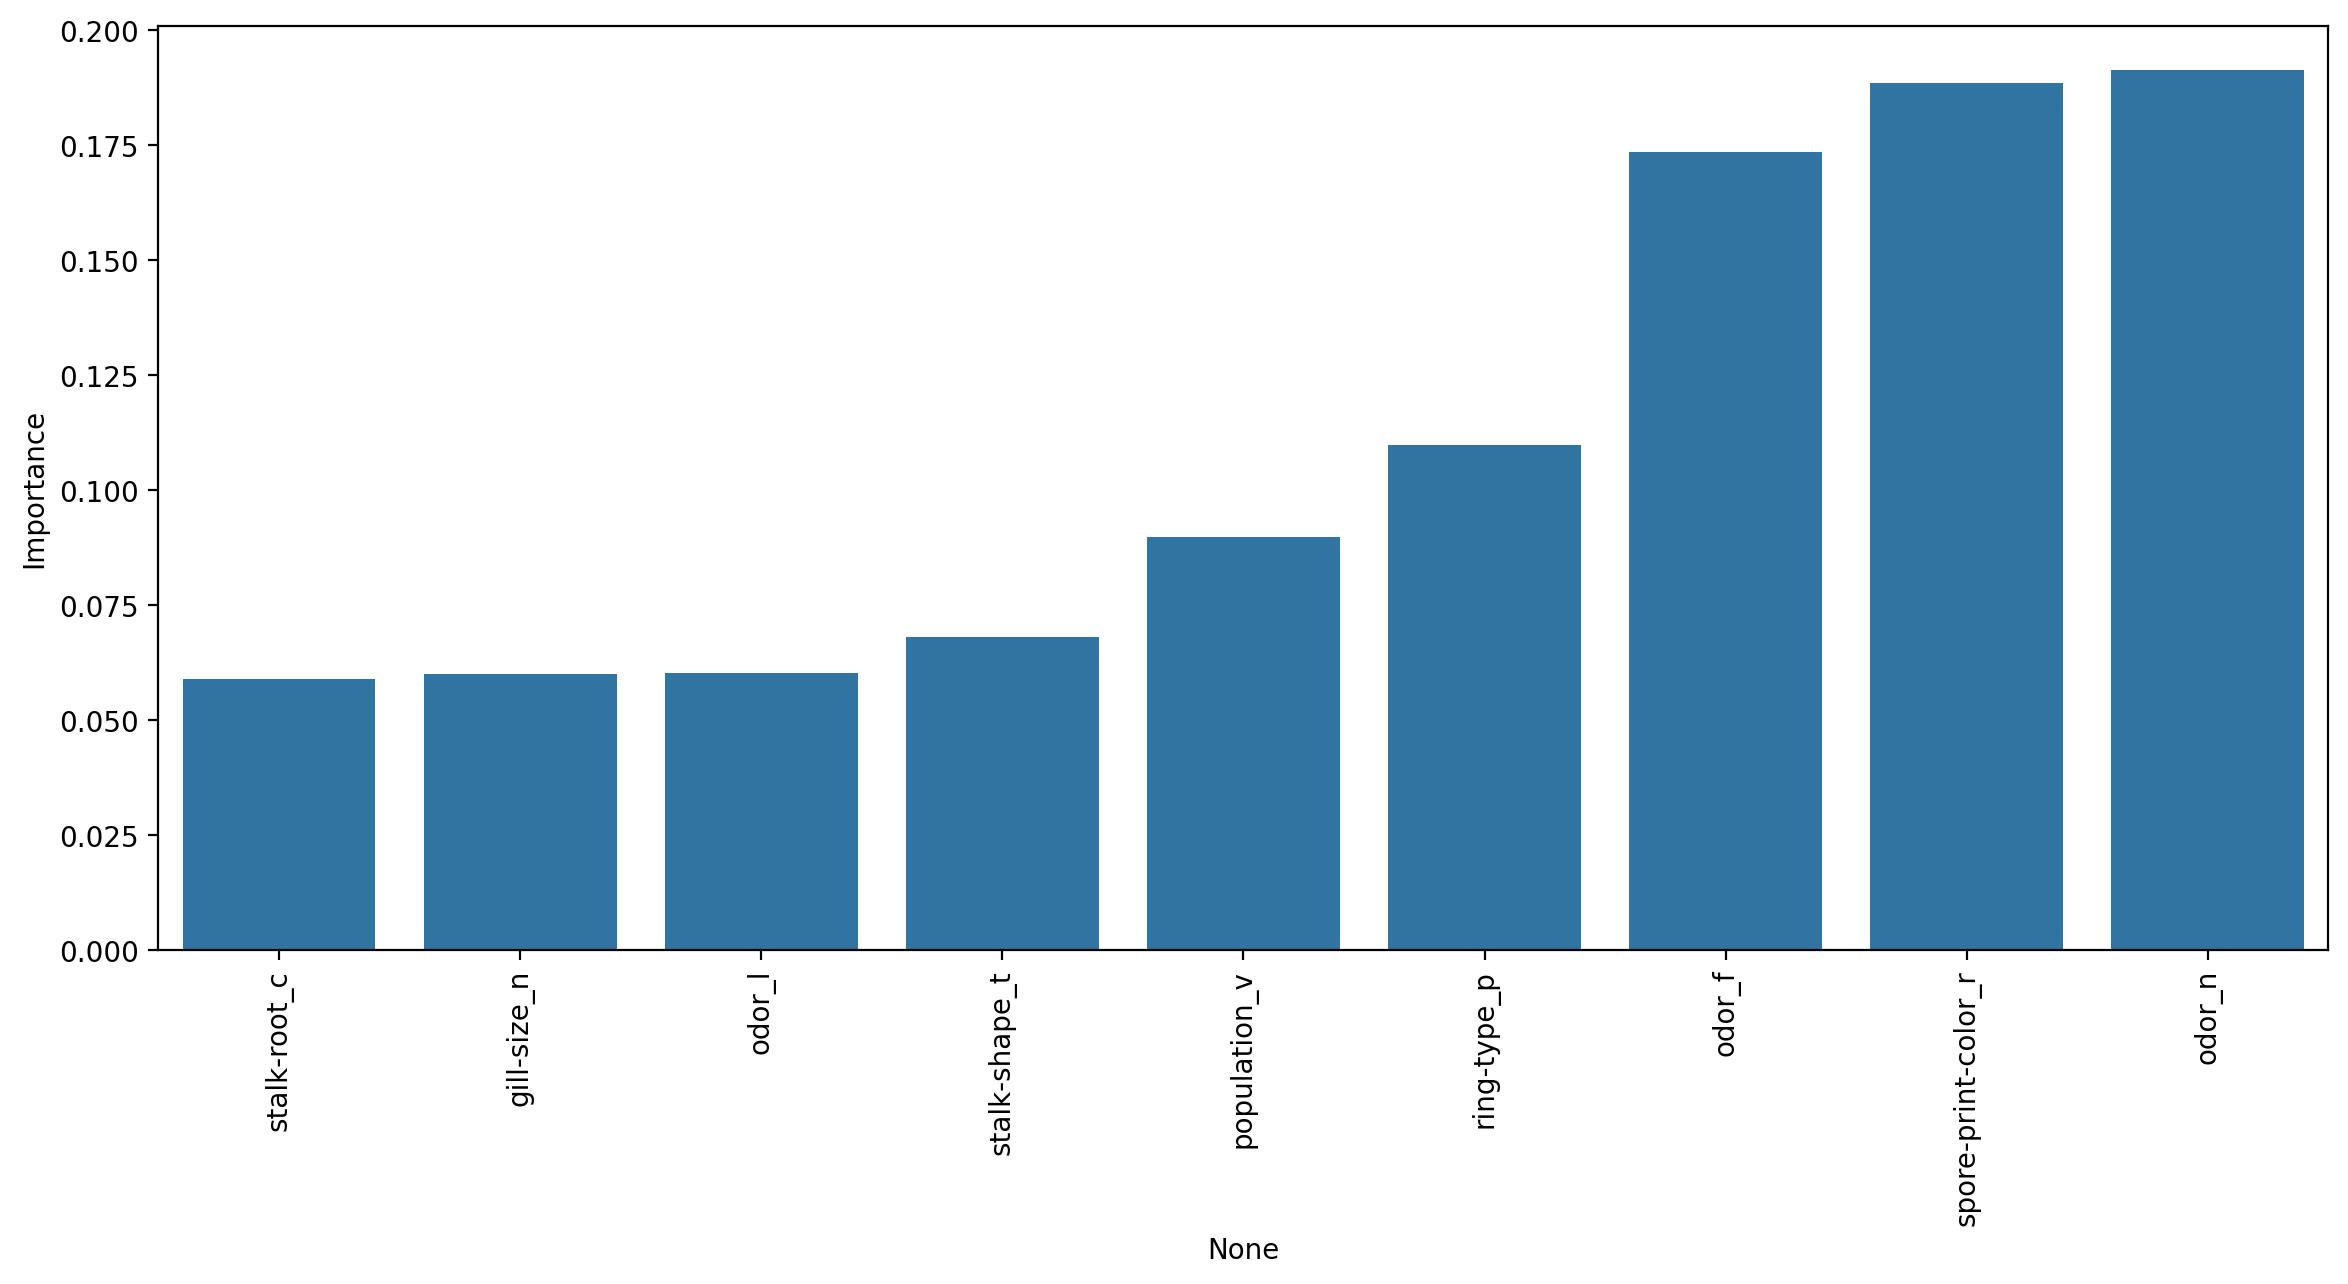

In [56]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=imp_features18, x=imp_features18.index, y='Importance')
plt.xticks(rotation=90);